# Network Security

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
data = np.random.rand(1000, 5) # 1000 data points, 5 features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
silhouette_scores = []
for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

In [3]:
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In [4]:
# Identify Anomalies
cluster_centers = kmeans.cluster_centers_
distances = np.linalg.norm(scaled_data - cluster_centers[cluster_labels], axis=1)
threshold = np.percentile(distances, 95) # Adjust as needed
anomalies_indices = np.where(distances > threshold)[0]
anomalies = data[anomalies_indices]
print("Anomalies: ")
print(anomalies)

Anomalies: 
[[0.41943953 0.82189615 0.26271803 0.04939656 0.93727812]
 [0.97840884 0.97129482 0.82215786 0.07250445 0.97768132]
 [0.12627596 0.91547434 0.6949402  0.89922732 0.72753803]
 [0.11455306 0.12405914 0.91514108 0.14923527 0.96551449]
 [0.99897051 0.07640987 0.7497642  0.68877852 0.24400977]
 [0.12148586 0.95822795 0.18576156 0.01882598 0.59647337]
 [0.91005294 0.95986787 0.45162658 0.73887444 0.02563052]
 [0.01965395 0.65516585 0.25766928 0.03708301 0.01330042]
 [0.20670568 0.03770938 0.40812919 0.64593067 0.09941277]
 [0.42151561 0.14799532 0.84635118 0.97701576 0.07016499]
 [0.97302724 0.09089242 0.25019912 0.21794481 0.14708688]
 [0.94225028 0.27854711 0.09517298 0.05887242 0.55299499]
 [0.55095686 0.02096524 0.03250899 0.02263189 0.06519767]
 [0.0078332  0.01104581 0.90159563 0.08457334 0.93325499]
 [0.03566085 0.01215345 0.00487092 0.09450553 0.03577081]
 [0.35095611 0.85960168 0.08301069 0.48973189 0.01722551]
 [0.0983938  0.59400581 0.06020406 0.04809597 0.83834539]
 [

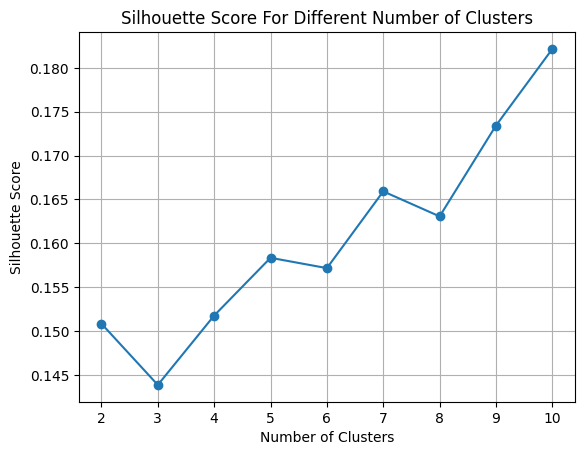

In [5]:
# Plot Silhouette Scores
num_clusters = range(2, 11)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score For Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks()
plt.yticks()
plt.grid(True)
plt.show()